# Compare 06 Distributions

#### Given multiple (two) sets of results generated from 06_Per_Node_Permutation.ipynb, acquire stat values

- Input: results_perm.csv path x2 (str)
- Out: Comparison figure, stat scores


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
RESULTS_PERM_A = "C:/Users/Konnor/Documents/Local/Files/Academic/Research/2025-06-01 Node Permutation Tests/3 LinearSVC Kernel, l2 hinge loss/results_perm.csv"
RESULTS_PERM_B = "C:/Users/Konnor/Documents/Local/Files/Academic/Research/2025-06-01 Node Permutation Tests/8 Null Model/results_perm.csv"

# Scores are obtained either from fcn on *grid.csv, or from 06_Per_Node
PERM_A__AD_HC__Score = 0.62
PERM_A__TBI_Score = 0.51
PERM_A__TRANSFER_Score = 0.58

PERM_B__AD_HC__Score = 0.46
PERM_B__TBI_Score = 0.5
PERM_B__TRANSFER_Score = 0.50

In [3]:
perm_a_df = pd.read_csv(RESULTS_PERM_A)
perm_b_df = pd.read_csv(RESULTS_PERM_B)
perm_a_df.sample(1)

Unnamed: 0                      Nodes  AD Score  TBI Score  \
73          73  [ 81 131 217 209   7  72]  0.504132   0.418182   

    Transfer Score  Scaled Transfer Score  AD Param-only Score  
73        0.527273               0.563636             0.436364

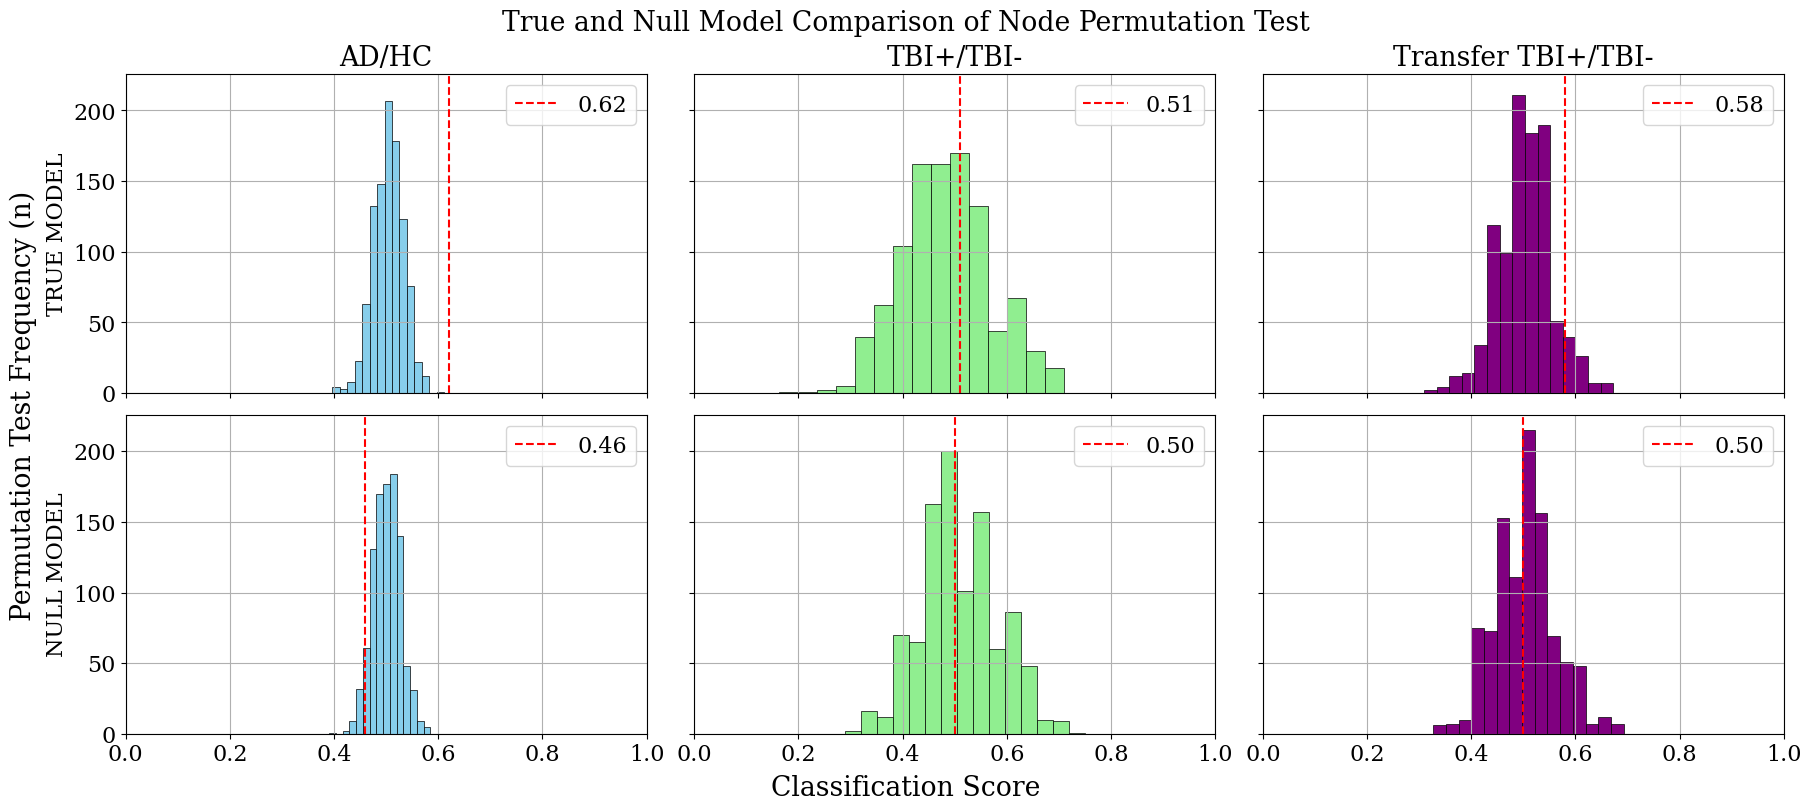

In [4]:
# First Row: PERM_A (True Model)
# Second Row: PERM_B (Null Model)
# Columns: AD/HC Score, TBI Score, Transfer Score
BIN_N = 15
LABEL_FONT = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }
plt.rc('font', **LABEL_FONT)

fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex='all', sharey='all', squeeze=True, layout='constrained')
fig.suptitle('True and Null Model Comparison of Node Permutation Test')
fig.supylabel('Permutation Test Frequency (n)')
fig.supxlabel('Classification Score')

axes[0][0].hist(perm_a_df["AD Score"], bins=BIN_N, color='skyblue', edgecolor='black', linewidth=0.5)
axes[0][0].axvline(PERM_A__AD_HC__Score, color='red', linestyle='--', label=f"{PERM_A__AD_HC__Score:.2f}")
axes[0][0].set_xlim(0,1)
axes[0][0].set_ylabel('TRUE MODEL')
axes[0][0].set_title('AD/HC')
axes[0][0].grid(True)

axes[0][1].hist(perm_a_df["TBI Score"], bins=BIN_N, color='lightgreen', edgecolor='black', linewidth=0.5)
axes[0][1].axvline(PERM_A__TBI_Score, color='red', linestyle='--', label=f"{PERM_A__TBI_Score:.2f}")
axes[0][1].set_title('TBI+/TBI-')
axes[0][1].grid(True)

axes[0][2].hist(perm_a_df["Transfer Score"], bins=BIN_N, color='purple', edgecolor='black', linewidth=0.5)
axes[0][2].axvline(PERM_A__TRANSFER_Score, color='red', linestyle='--', label=f"{PERM_A__TRANSFER_Score:.2f}")
axes[0][2].set_title('Transfer TBI+/TBI-')
axes[0][2].grid(True)

axes[1][0].hist(perm_b_df["AD Score"], bins=BIN_N, color='skyblue', edgecolor='black', linewidth=0.5)
axes[1][0].axvline(PERM_B__AD_HC__Score, color='red', linestyle='--', label=f"{PERM_B__AD_HC__Score:.2f}")
axes[1][0].set_ylabel('NULL MODEL')
axes[1][0].grid(True)

axes[1][1].hist(perm_b_df["TBI Score"], bins=BIN_N, color='lightgreen', edgecolor='black', linewidth=0.5)
axes[1][1].axvline(PERM_B__TBI_Score, color='red', linestyle='--', label=f"{PERM_B__TBI_Score:.2f}")
axes[1][1].grid(True)

axes[1][2].hist(perm_b_df["Transfer Score"], bins=BIN_N, color='purple', edgecolor='black', linewidth=0.5)
axes[1][2].axvline(PERM_B__TRANSFER_Score, color='red', linestyle='--', label=f"{PERM_B__TRANSFER_Score:.2f}")
axes[1][2].grid(True)

for ax in axes.flat:
    ax.legend(loc="upper right")

C:\Users\Konnor\AppData\Local\Temp\ipykernel_2552\439547178.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = long_data.groupby(['Case', 'Model']).apply(lambda x: x.sample(75, random_state=42)).reset_index(drop=True)
C:\Users\Konnor\AppData\Local\Temp\ipykernel_2552\439547178.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


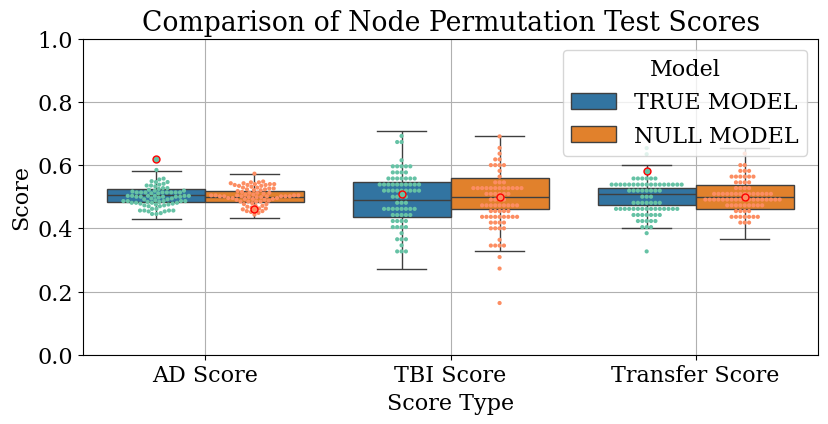

In [5]:
perm_a_long = pd.melt(perm_a_df, value_vars=["AD Score", "TBI Score", "Transfer Score"],
                     var_name="Case", value_name="Classification Score")
perm_a_long["Model"] = "TRUE MODEL"

perm_b_long = pd.melt(perm_b_df, value_vars=["AD Score", "TBI Score", "Transfer Score"],
                     var_name="Case", value_name="Classification Score")
perm_b_long["Model"] = "NULL MODEL"
long_data = pd.concat([perm_a_long, perm_b_long])
sampled_data = long_data.groupby(['Case', 'Model']).apply(lambda x: x.sample(75, random_state=42)).reset_index(drop=True)

optimal_data = [
    ["AD Score", "TRUE MODEL", 0.62],
    ["AD Score", "NULL MODEL", 0.46],
    ["TBI Score", "TRUE MODEL", 0.51],
    ["TBI Score", "NULL MODEL", 0.50],
    ["Transfer Score", "TRUE MODEL", 0.58],
    ["Transfer Score", "NULL MODEL", 0.50],
]

plt.figure(figsize=(10, 5), layout='constrained')
sns.boxplot(x="Case", y="Classification Score", hue="Model", data=long_data, showfliers=False)
sns.swarmplot(x="Case", y="Classification Score", hue="Model", data=sampled_data, dodge=True,
              palette="Set2", alpha=1, size=3, legend=False)
sns.swarmplot(x="Case", y="Classification Score", hue="Model", data=pd.DataFrame(optimal_data, columns=["Case", "Model", "Classification Score"]), dodge=True,
              palette="Set2", alpha=1, edgecolor="red", linewidth=1, size=5, legend=False)

plt.title('Comparison of Node Permutation Test Scores')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.legend(title="Model", loc="upper right")
plt.tight_layout()
plt.ylim(0, 1)
plt.grid('minor')

plt.show()

#### Statistical Comparisons


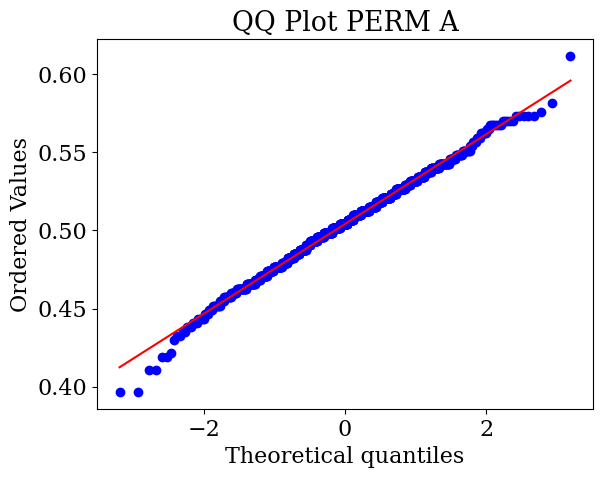

In [6]:
stats.probplot(perm_a_df["AD Score"], dist="norm", plot=plt)
plt.title('QQ Plot PERM A')
plt.show()

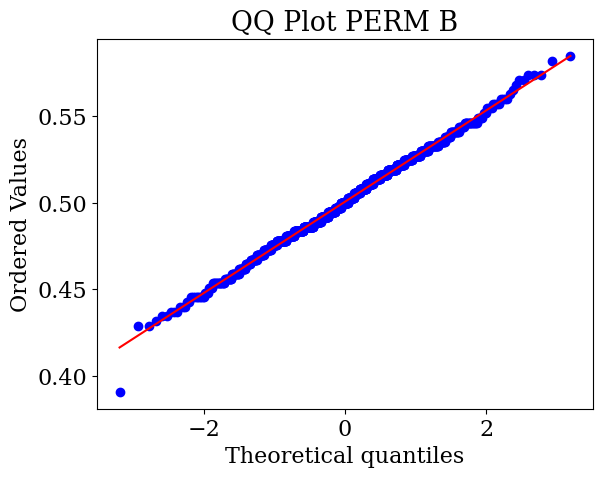

In [7]:
stats.probplot(perm_b_df["AD Score"], dist="norm", plot=plt)
plt.title('QQ Plot PERM B')
plt.show()

In [8]:
TEST_AD_TRUE = stats.ttest_ind(perm_a_df["AD Score"], perm_b_df["AD Score"], equal_var=False)
TEST_TBI = stats.ttest_ind(perm_a_df["TBI Score"], perm_b_df["TBI Score"], equal_var=False)
TEST_TRANSFER = stats.ttest_ind(perm_a_df["Transfer Score"], perm_b_df["Transfer Score"], equal_var=False)

results = {
    "Test": ["AD Score", "TBI Score", "Transfer Score"],
    "Statistic": [TEST_AD.statistic, TEST_TBI.statistic, TEST_TRANSFER.statistic],
    "p-value": [TEST_AD.pvalue, TEST_TBI.pvalue, TEST_TRANSFER.pvalue]}

df = pd.DataFrame(results)
print(df.to_markdown(index=False))

NameError: name 'TEST_AD' is not defined

In [ ]:
TEST_AD_TRUE = stats.ttest_ind(perm_a_df["AD Score"], optimal_data[0][2], alternative='less')
TEST_AD_NULL = stats.ttest_ind(perm_a_df["AD Score"], optimal_data[1][2], alternative='less')

TEST_TBI_TRUE = stats.ttest_ind(perm_a_df["TBI Score"], optimal_data[2][2], alternative='less')
TEST_TBI_NULL = stats.ttest_ind(perm_a_df["TBI Score"], optimal_data[3][2], alternative='less')

TEST_TRANSFER_TRUE = stats.ttest_ind(perm_a_df["Transfer Score"], optimal_data[4][2], alternative='less')
TEST_TRANSFER_NULL = stats.ttest_ind(perm_a_df["Transfer Score"], optimal_data[5][2], alternative='less')

results = {
    "Test": ["AD True Model", "AD Null Model", "TBI True Model", "TBI Null Model", "Transfer True Model" , "Transfer Null Model"],
    "Statistic": [TEST_AD_TRUE.statistic, TEST_AD_NULL.statistic, TEST_TBI_TRUE.statistic, TEST_TBI_NULL.statistic, TEST_TRANSFER_TRUE.statistic, TEST_TRANSFER_NULL.statistic],
    "p-value": [TEST_AD_TRUE.pvalue, TEST_AD_NULL.pvalue, TEST_TBI_TRUE.pvalue, TEST_TBI_NULL.pvalue, TEST_TRANSFER_TRUE.pvalue, TEST_TRANSFER_NULL.pvalue]}

df = pd.DataFrame(results)
print(df.to_clipboard(index=False))